In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba2k20-player-dataset/nba2k-full.csv


# Goal: Salary Prediction of nba 2k players

Use a support vector regression model to 

1. Predict a player's salary given their rating in the NBA 2k video game
2. Predict a player's salary given their height, weight, rating, and year drafted in the NBA 2k video game

Our expectation is that training using more features should perform better.

### Importing the dataset

In [2]:
dataset = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k-full.csv')
X = dataset.iloc[:, 1].values  # use ratings as initial feature
y = dataset['salary'].str.replace('$', '').values
y = y.astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

X_train, y_train = X_train.reshape(len(X_train), 1), y_train.reshape((len(y_train), 1))
X_test, y_test = X_test.reshape(len(X_test), 1), y_test.reshape((len(y_test), 1))

### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)


### Training the SVR model

In [5]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting a new result

In [6]:
salary_for_player_rated_65 = sc_y.inverse_transform(regressor.predict(sc_X.transform([[65]])).reshape(-1,1))
salary_for_player_rated_95 = sc_y.inverse_transform(regressor.predict(sc_X.transform([[95]])).reshape(-1,1))

print(salary_for_player_rated_65, salary_for_player_rated_95)


[[5456904.26309247]] [[34916154.98934291]]


### Visualising the SVR training results

[45780966.]


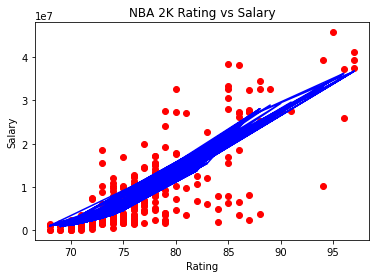

In [7]:
import matplotlib.pyplot as plt

plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'red')
print(max(sc_y.inverse_transform(y_train)))
predicted_salaries = sc_y.inverse_transform(regressor.predict(X_train).reshape(-1,1))
plt.plot(sc_X.inverse_transform(X_train), predicted_salaries, color = 'blue')

plt.title('NBA 2K Rating vs Salary')
plt.xlabel('Rating')
plt.ylabel('Salary')
plt.show()

### Visualising the Test set results

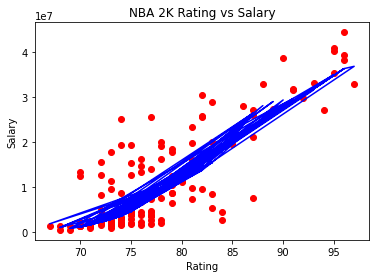

In [18]:
plt.scatter(X_test, y_test, color = 'red')
predicted_salaries = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
plt.plot(X_test, predicted_salaries, color = 'blue')

plt.title('NBA 2K Rating vs Salary')
plt.xlabel('Rating')
plt.ylabel('Salary')
plt.show()

### Scoring accuracy of classifier

In [34]:
# https://subscription.packtpub.com/book/data/9781789808452/1/ch01lvl1sec12/computing-regression-accuracy

import sklearn.metrics as sm

y_test_pred = predicted_salaries

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

# with an R2 score = 0.68 this model isn't great (want to be as close to 1 as possible, let's see if training using more features helps)

Mean absolute error = 4059400.96
Mean squared error = 38742434606415.56
Median absolute error = 1842999.98
Explain variance score = 0.7
R2 score = 0.68


# Train based on height, weight, rating, and draft year

In [37]:
dataset = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k-full.csv')

In [92]:
ratings = dataset['rating'].values.reshape(len(dataset['rating']), 1)  # use ratings as initial feature

height = dataset['height'].values
height = np.array([u[-4:] for u in height]).astype(float)
height = height.reshape(len(dataset['height']), 1)

weight = dataset['weight'].values
weight = np.array([u[:4] for u in weight]).astype(int)
weight = weight.reshape(len(dataset['weight']), 1)

draft_year = dataset['draft_year'].values
draft_year = draft_year.reshape(len(dataset['draft_year']), 1)

X = np.concatenate((ratings, height, weight, draft_year), axis=1)

y = dataset['salary'].str.replace('$', '').values
y = y.astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

y_train = y_train.reshape((len(y_train), 1))
y_test = y_test.reshape((len(y_test), 1))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(292, 4) (292, 1) (147, 4) (147, 1)


In [100]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)


In [101]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [112]:
# https://subscription.packtpub.com/book/data/9781789808452/1/ch01lvl1sec12/computing-regression-accuracy

import sklearn.metrics as sm

y_test_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

# with an R2 score = 0.76 this model is better than when training on just the ratings 0.68

Mean absolute error = 3643803.49
Mean squared error = 28920893295929.98
Median absolute error = 2523931.3
Explain variance score = 0.78
R2 score = 0.76


In [111]:
salary_for_player_rated_95 = sc_y.inverse_transform(regressor.predict(sc_X.transform([[95, 2.10, 250, 2004]])).reshape(-1,1))
# salary_for_player_rated_95 = sc_y.inverse_transform(regressor.predict(sc_X.transform([[95]])).reshape(-1,1))

print(salary_for_player_rated_95) #   $37,100,360  sounds about right for an nba 2k player rated 95!


[[37100360.76647301]]


## Conclusion

As we expected, training using more features resulted in a more accurate model.